<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-12-15 22:26:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.0MB/s    in 2.2s    

2025-12-15 22:26:15 (68.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



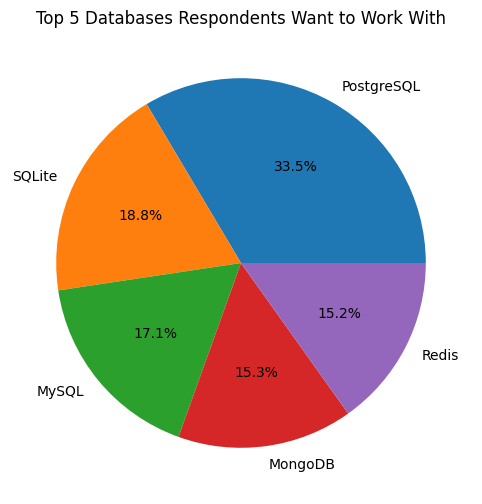

In [4]:
df_data = df.dropna(subset=('DatabaseWantToWorkWith')).copy()
df_data['DatabaseWantToWorkWith'] = df_data['DatabaseWantToWorkWith'].str.split(';')
df_data = df_data.explode('DatabaseWantToWorkWith')

df_data = df_data['DatabaseWantToWorkWith'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_data['count'], labels=df_data['DatabaseWantToWorkWith'], autopct='%1.1f%%')

plt.title('Top 5 Databases Respondents Want to Work With')
plt.xticks([])
plt.yticks([])
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



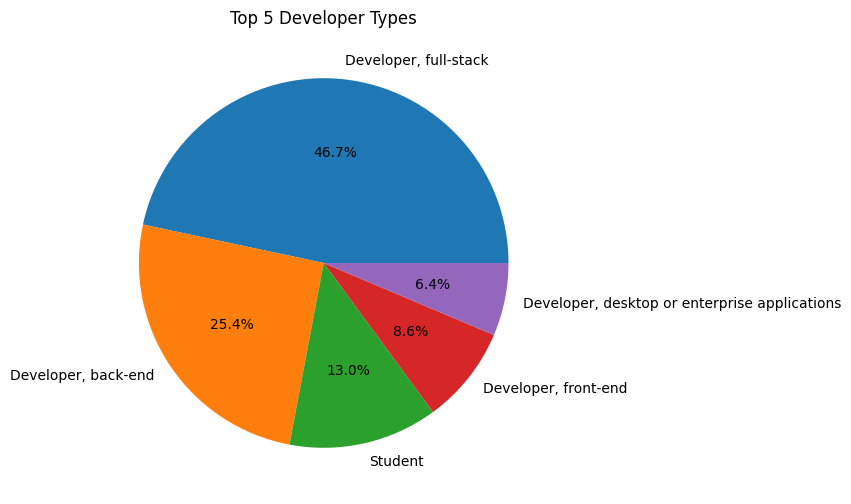

In [5]:
df_dev = df.dropna(subset=('DevType')).copy()
df_dev = df['DevType'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_dev['count'], labels=df_dev['DevType'], autopct='%1.1f%%')

plt.title('Top 5 Developer Types')
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



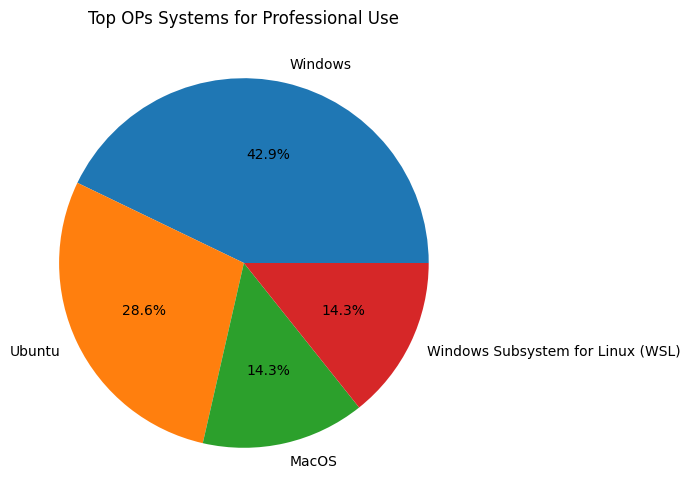

In [6]:
df_ops = df['OpSysProfessional use'].value_counts().reset_index().head()
df_ops['OpSysProfessional use'] = df_ops['OpSysProfessional use'].str.split(';')
df_ops['OpSysProfessional use'] = df_ops['OpSysProfessional use']
df_ops = df_ops.explode('OpSysProfessional use')

df_ops['OpSysProfessional use'] = df_ops['OpSysProfessional use'].str.strip()
df_ops = df_ops['OpSysProfessional use'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_ops['count'], labels=df_ops['OpSysProfessional use'], autopct='%1.1f%%')

plt.title('Top OPs Systems for Professional Use')
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



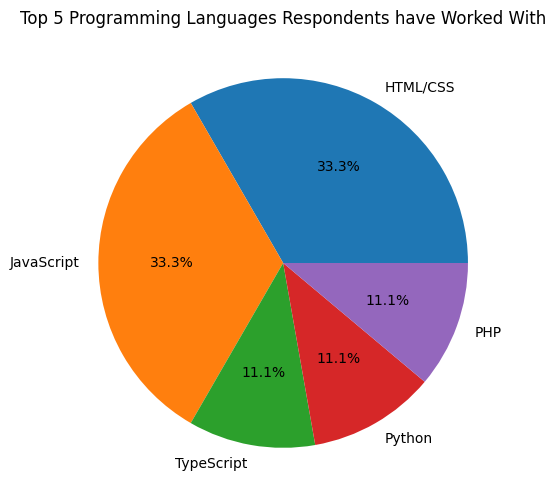

In [7]:
df_lang = df['LanguageHaveWorkedWith'].value_counts().reset_index().head()
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()
df_lang = df_lang['LanguageHaveWorkedWith'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_lang['count'], labels=df_lang['LanguageHaveWorkedWith'], autopct='%1.1f%%')
plt.title('Top 5 Programming Languages Respondents have Worked With')
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



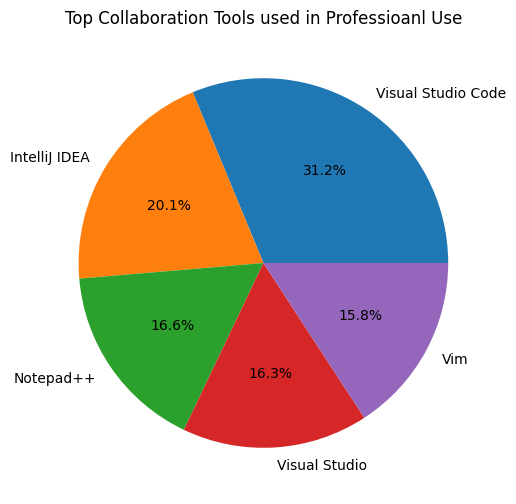

In [8]:
df_new = df['NEWCollabToolsHaveWorkedWith'].value_counts().reset_index()
df_new['NEWCollabToolsHaveWorkedWith'] = df_new['NEWCollabToolsHaveWorkedWith'].str.split(';') 
df_new = df_new.explode('NEWCollabToolsHaveWorkedWith')
df_new['NEWCollabToolsHaveWorkedWith'] = df_new['NEWCollabToolsHaveWorkedWith'].str.strip()
df_new = df_new['NEWCollabToolsHaveWorkedWith'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_new['count'], labels=df_new['NEWCollabToolsHaveWorkedWith'], autopct='%1.1f%%')
plt.title('Top Collaboration Tools used in Professioanl Use')
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



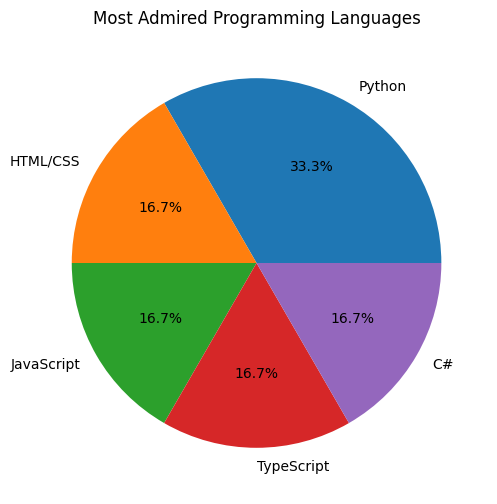

In [9]:
df_admire = df['LanguageAdmired'].value_counts().reset_index().head()
df_admire['LanguageAdmired'] = df_admire['LanguageAdmired'].str.split(';') 
df_admire = df_admire.explode('LanguageAdmired')
df_admire['LanguageAdmired'] = df_admire['LanguageAdmired'].str.strip()
df_admire = df_admire['LanguageAdmired'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_admire['count'], labels=df_admire['LanguageAdmired'], autopct='%1.1f%%')
plt.title('Most Admired Programming Languages')
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



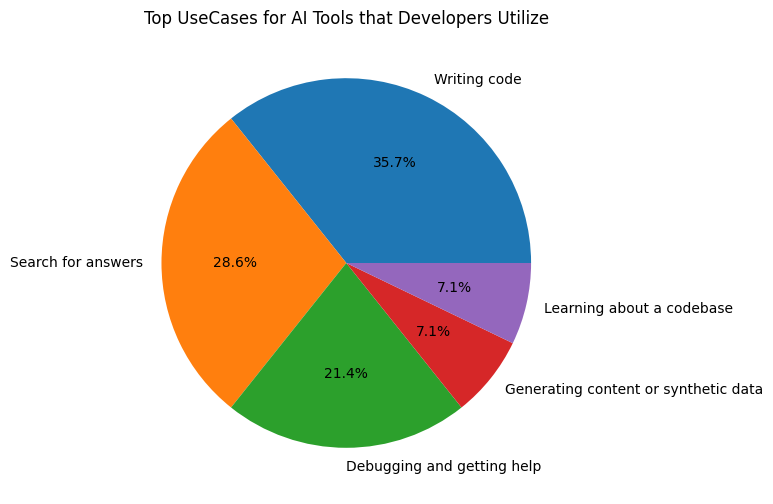

In [10]:
df_ai = df['AIToolCurrently Using'].value_counts().reset_index().head()
df_ai['AIToolCurrently Using'] = df_ai['AIToolCurrently Using'].str.split(';') 
df_ai = df_ai.explode('AIToolCurrently Using')
df_ai['AIToolCurrently Using'] = df_ai['AIToolCurrently Using'].str.strip()
df_ai = df_ai['AIToolCurrently Using'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_ai['count'], labels=df_ai['AIToolCurrently Using'], autopct='%1.1f%%')
plt.title('Top UseCases for AI Tools that Developers Utilize')
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



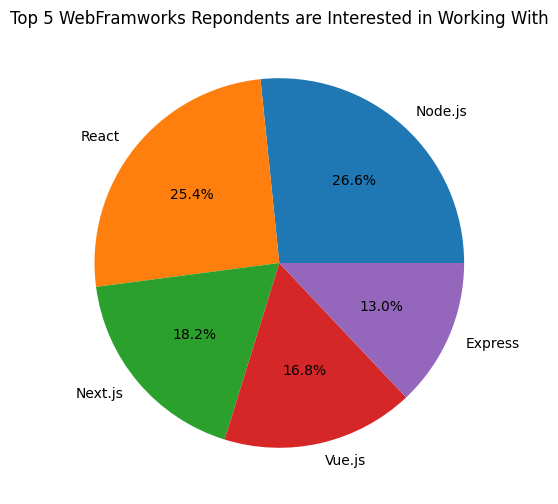

In [11]:
df_web = df['WebframeWantToWorkWith'].value_counts().reset_index()
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('WebframeWantToWorkWith')
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.strip()
df_web = df_web['WebframeWantToWorkWith'].value_counts().reset_index().head()

plt.figure(figsize=(12,6))
plt.pie(df_web['count'],labels=df_web['WebframeWantToWorkWith'], autopct='%1.1f%%')
plt.title('Top 5 WebFramworks Repondents are Interested in Working With')

plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



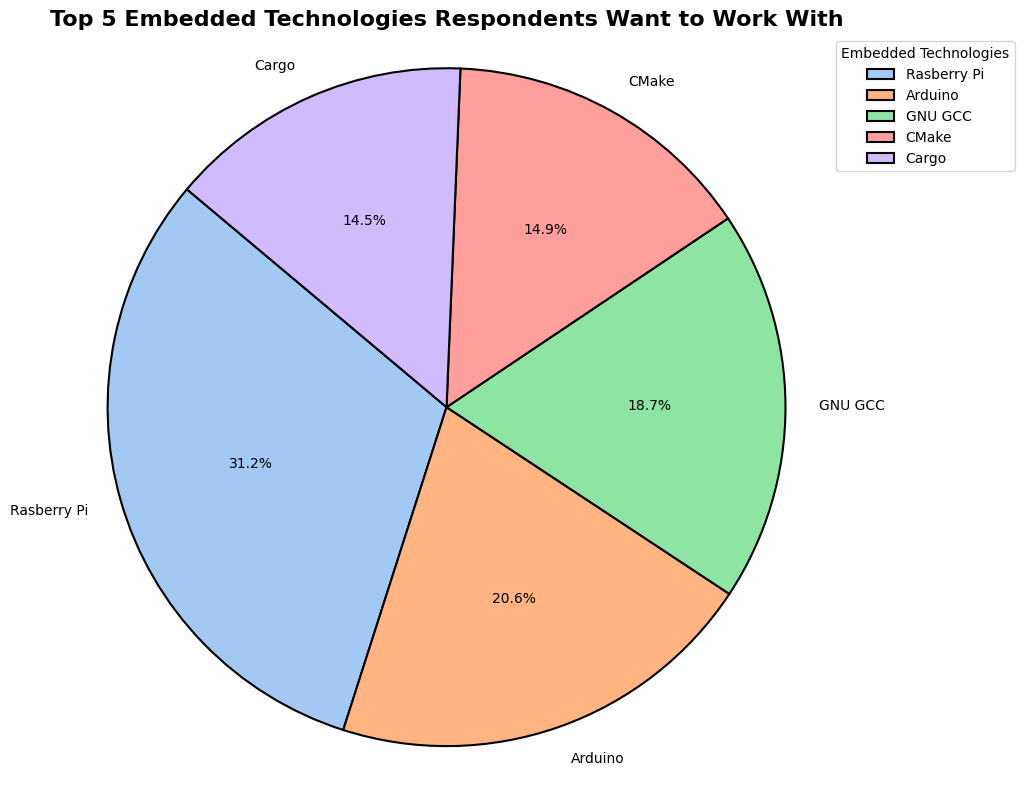

In [19]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out missing values in 'EmbeddedWantToWorkWith'
df_filtered = df[df['EmbeddedWantToWorkWith'].notna()]

# Get the top 5 embedded technologies respondents want to work with
top_5_embedded = df_filtered['EmbeddedWantToWorkWith'].str.split(';').explode().str.strip().value_counts().head(5)
# Added .str.strip() above to clean up whitespace in technology names

# Define a color palette
colors = sns.color_palette('pastel')[0:5]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_embedded, labels=top_5_embedded.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True})
plt.title("Top 5 Embedded Technologies Respondents Want to Work With", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Embedded Technologies', loc='upper right', bbox_to_anchor=(1.2, 1))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
